<a href="https://colab.research.google.com/github/RatchanonPa/python_dataviz2024/blob/main/Visualize_Data_Comparison_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import os
from datetime import datetime as dt
from datetime import time

In [10]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) # บังคับให้เชื่อมข้อมูลใน drive ใหม่ เพราะลบข้อมูลเดิมออก

Mounted at /content/drive


In [11]:
path = '/content/drive/MyDrive/data_viz_2024_DATA'

In [13]:
data = pd.read_csv(os.path.join(path,'barchart_data.csv'))
data = data.iloc[:,1:]
data.head()

,Year,Quarter,Region,Brand,Price Category,Sales
0,2021,Q1,North America,BrandA,Budget,8270
1,2021,Q1,North America,BrandA,Mid-range,1860
2,2021,Q1,North America,BrandA,Premium,6390
3,2021,Q1,North America,BrandB,Budget,6191
4,2021,Q1,North America,BrandB,Mid-range,6734


In [16]:
data['Price Category'] = data['Price Category'].replace('Budget', 'รุ่นประหยัด')
data['Price Category'] = data['Price Category'].replace('Mid-range', 'รุ่นเริ่มต้น')
data['Price Category'] = data['Price Category'].replace('Premium', 'รุ่นเรือธง')

In [17]:
data

,Year,Quarter,Region,Brand,Price Category,Sales
0,2021,Q1,North America,BrandA,รุ่นประหยัด,8270
1,2021,Q1,North America,BrandA,รุ่นเริ่มต้น,1860
2,2021,Q1,North America,BrandA,รุ่นเรือธง,6390
3,2021,Q1,North America,BrandB,รุ่นประหยัด,6191
4,2021,Q1,North America,BrandB,รุ่นเริ่มต้น,6734
...,...,...,...,...,...,...
475,2022,Q4,Africa,BrandC,รุ่นเริ่มต้น,6486
476,2022,Q4,Africa,BrandC,รุ่นเรือธง,9335
477,2022,Q4,Africa,BrandD,รุ่นประหยัด,5980
478,2022,Q4,Africa,BrandD,รุ่นเริ่มต้น,8266


## เตรียมข้อมูล

#### แปลงข้อมูลบอกเวลาให้เป็นตัวแปรชนิด datetime

In [ ]:
data['search_timestamp']  = pd.to_datetime(data['search_timestamp'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

## Bar chart (กราฟแท่ง)
(กราฟผลไม้)

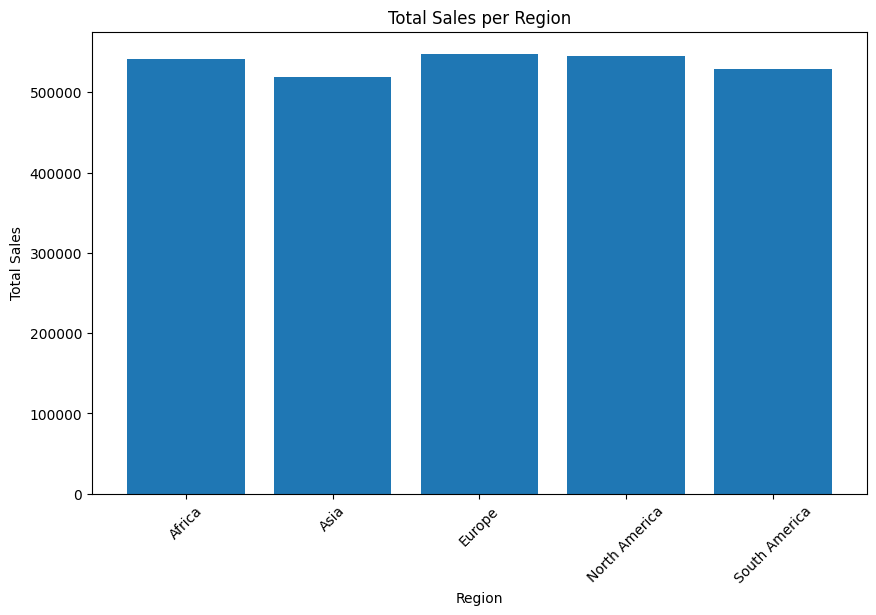

In [19]:
# prompt: plot bar chart เปรียบเทียบปริมาณ sales ในแต่ละ region ทั้งหมดของแต่ละ region ด้วยคำสั่ง plt.bar
# Group data by region and sum sales
region_sales = data.groupby('Region')['Sales'].sum()# x_axis_values

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(region_sales.index, region_sales.values) #y_axis_values

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales per Region')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

In [20]:
region_sales

,Sales
Region,
Africa,541556
Asia,519608
Europe,548068
North America,545563
South America,529246


In [23]:
region_sales.values

array([124543, 144451, 141602, 130960, 123201, 140369, 125413, 130625,
       136996, 139328, 141905, 129839, 130631, 144435, 124104, 146393,
       127485, 138468, 132925, 130368])

In [24]:
region_sales.index

MultiIndex([(       'Africa', 'Q1'),
            (       'Africa', 'Q2'),
            (       'Africa', 'Q3'),
            (       'Africa', 'Q4'),
            (         'Asia', 'Q1'),
            (         'Asia', 'Q2'),
            (         'Asia', 'Q3'),
            (         'Asia', 'Q4'),
            (       'Europe', 'Q1'),
            (       'Europe', 'Q2'),
            (       'Europe', 'Q3'),
            (       'Europe', 'Q4'),
            ('North America', 'Q1'),
            ('North America', 'Q2'),
            ('North America', 'Q3'),
            ('North America', 'Q4'),
            ('South America', 'Q1'),
            ('South America', 'Q2'),
            ('South America', 'Q3'),
            ('South America', 'Q4')],
           names=['Region', 'Quarter'])

In [25]:
region_sales.reset_index()['Region']

,Region
0,Africa
1,Africa
2,Africa
3,Africa
4,Asia
5,Asia
6,Asia
7,Asia
8,Europe
9,Europe


In [21]:
# Group data by region and sum sales
region_sales = data.groupby(['Region', 'Quarter'])['Sales'].sum()
region_sales

Region         Quarter
Africa         Q1         124543
               Q2         144451
               Q3         141602
               Q4         130960
Asia           Q1         123201
               Q2         140369
               Q3         125413
               Q4         130625
Europe         Q1         136996
               Q2         139328
               Q3         141905
               Q4         129839
North America  Q1         130631
               Q2         144435
               Q3         124104
               Q4         146393
South America  Q1         127485
               Q2         138468
               Q3         132925
               Q4         130368
Name: Sales, dtype: int64

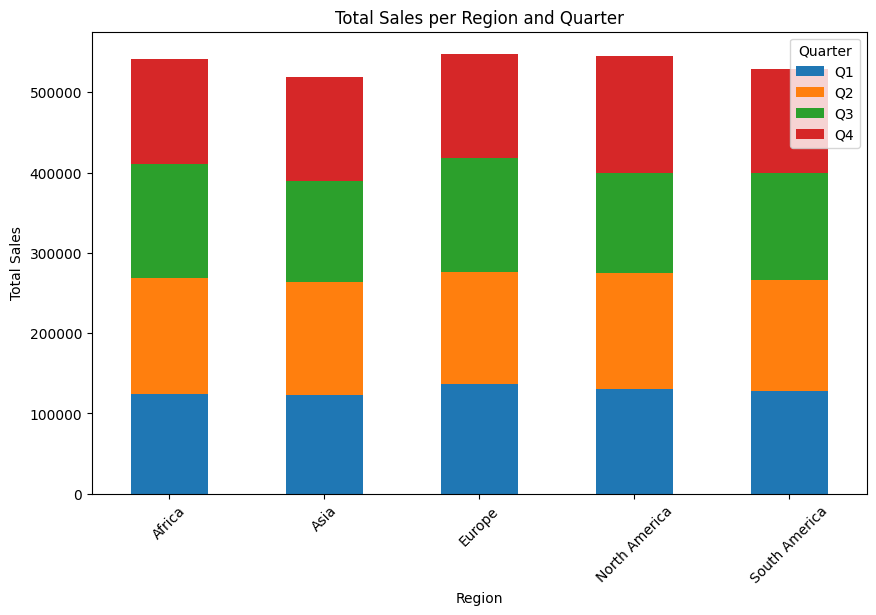

In [22]:
# prompt: plot bar chart เปรียบเทียบปริมาณ sales ในแต่ละ Quarterของแต่ละ region ด้วย stacked barchart โดยใช้คำสั่ง plt.bar
# Group data by region and quarter, then sum sales
region_quarter_sales = data.groupby(['Region', 'Quarter'])['Sales'].sum().unstack()

# Create stacked bar chart
region_quarter_sales.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales per Region and Quarter')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


## plot stacked barchart ของแต่ละ region โดยดูจาก contribution ของ Price category

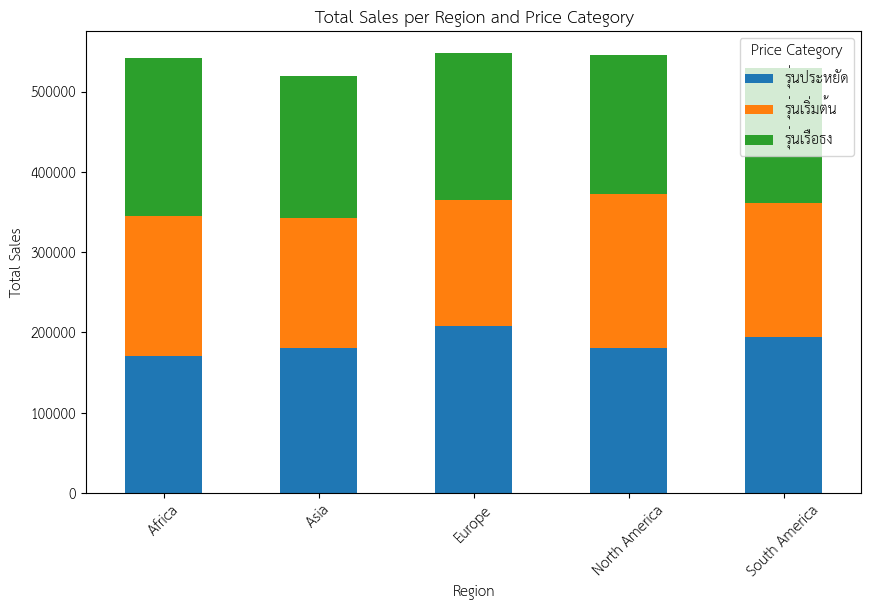

In [29]:
# prompt: plot stacked barchart ของแต่ละ region โดยดูจาก contribution ของ Price category
# Group data by region and price category, then sum sales
region_price_category_sales = data.groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create stacked bar chart
region_price_category_sales.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales per Region and Price Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

In [26]:
import matplotlib
matplotlib.__version__

'3.7.1'

การแสดงตัวอักษรภาษาไทยในกราฟ matplotlib
https://medium.com/@kanyawee.work/%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%82%E0%B8%AD%E0%B8%87-matplotlib-%E0%B8%9A%E0%B8%99-google-colab-37210d9a9f31


https://colab.research.google.com/drive/1sTdTZx_Cm51mc8OL_QHtehWyO4725sGl#scrollTo=Ak9SbVd5L7U8

In [27]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [28]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

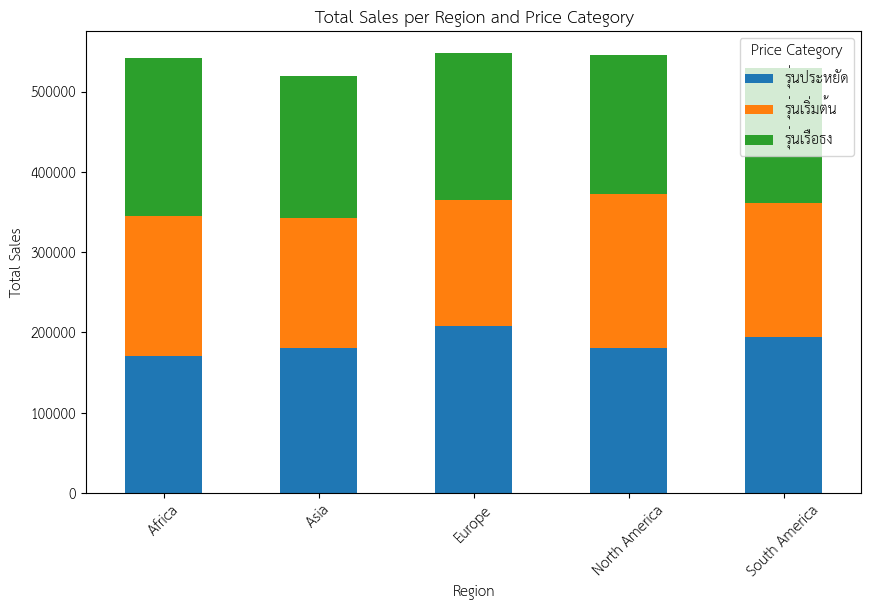

In [30]:
# prompt: plot stacked barchart ของแต่ละ region โดยดูจาก contribution ของ Price category
# Group data by region and price category, then sum sales
region_price_category_sales = data.groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create stacked bar chart
region_price_category_sales.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales per Region and Price Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

## Plot stacked barchart ด้วย matplotlib

In [31]:
region_brand_sales = data.groupby(['Region', 'Brand'])['Sales'].sum().unstack()
region_brand_sales

Brand,BrandA,BrandB,BrandC,BrandD
Region,,,,
Africa,132019,140187,132273,137077
Asia,136205,124678,139677,119048
Europe,135638,135069,131700,145661
North America,124810,153135,140802,126816
South America,144169,138543,115774,130760


In [33]:
region_brand_sales['BrandA'].values

array([132019, 136205, 135638, 124810, 144169])

In [35]:
region_brand_sales.index

Index(['Africa', 'Asia', 'Europe', 'North America', 'South America'], dtype='object', name='Region')

## plot ส่วนแรก

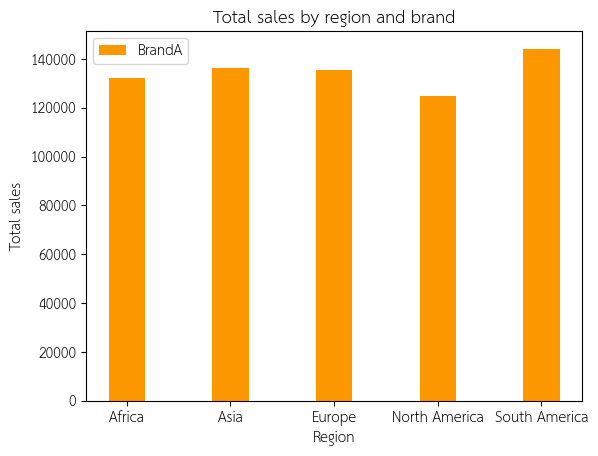

In [34]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index, region_brand_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
#ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

## plot ส่วนที่ 2

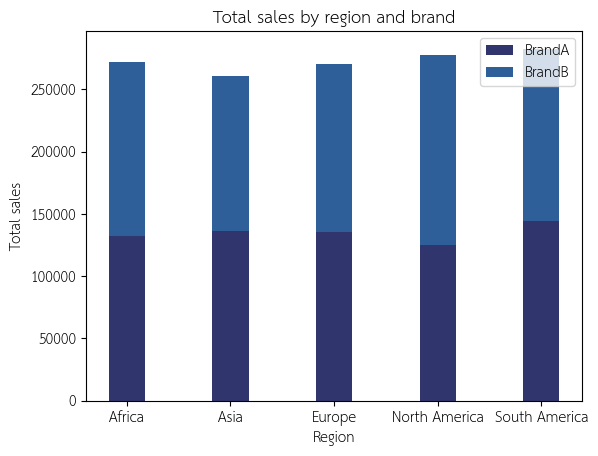

In [41]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index, region_brand_sales['BrandA'].values, width, label='BrandA',color = '#31356e')
ax.bar(region_brand_sales.index, region_brand_sales['BrandB'].values, width, bottom=region_brand_sales['BrandA'].values, label='BrandB',color = '#2f5f98')

ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

## plot ส่วนที่ 3 ขึ้นไป

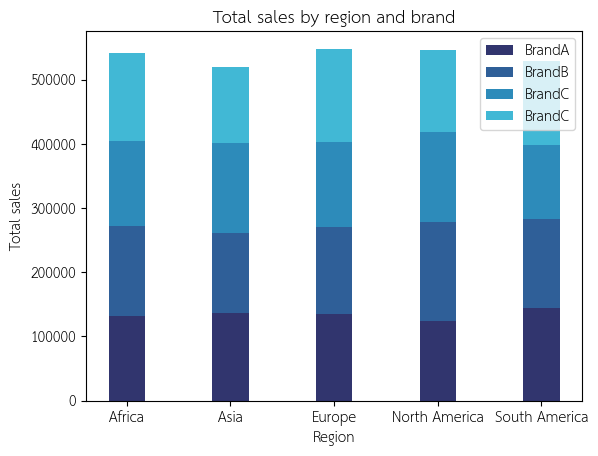

In [45]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index, region_brand_sales['BrandA'].values, width, label='BrandA',color = '#31356e')
ax.bar(region_brand_sales.index, region_brand_sales['BrandB'].values, width, bottom=region_brand_sales['BrandA'].values, label='BrandB',color = '#2f5f98')
ax.bar(region_brand_sales.index, region_brand_sales['BrandC'].values, width, bottom=region_brand_sales['BrandA'] + region_brand_sales['BrandB'].values, label='BrandC',color = '#2d8bba')
ax.bar(region_brand_sales.index, region_brand_sales['BrandD'].values, width, bottom=region_brand_sales['BrandA'] + region_brand_sales['BrandB'].values + region_brand_sales['BrandC'].values, label='BrandC',color = '#41b8d5')

ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

## Grouped Bar chart (เปรียบเทียบในกลุ่ม)

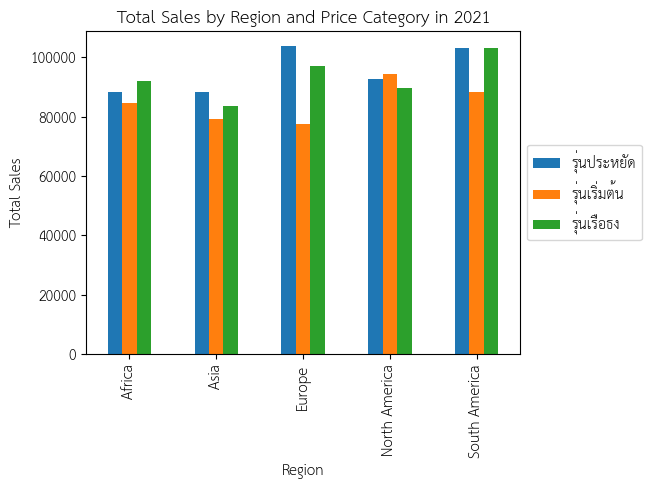

In [47]:
# prompt: plot grouped bar chart ของแต่ละ region ในปี 2021 เพื่อเปรียบเทียบ sales ของแต่ละ price category ย้าย legend ออกไปข้างนอกกราฟ ปรับขนาดplotให้เล็กลง 30%

# Filter data for the year 2021
data_2021 = data[data['Year'] == 2021]

# Group data by region and price category, then sum sales
region_price_category_sales_2021 = data_2021.groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create the grouped bar chart
ax = region_price_category_sales_2021.plot(kind='bar', figsize=(8, 6))

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category in 2021')

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Adjust plot size
plt.gcf().set_size_inches(plt.gcf().get_size_inches() * 0.7)

# Show the plot
plt.show()

## plot grouped bar chart โดยแยกกลุ่มตามประเภทหนังและเปรียบเทียบ Rating จาก ความยาวของหนัง

In [48]:
movie_file_path = os.path.join(path,'IMDb Movies India.csv')
print(movie_file_path)

/content/drive/MyDrive/data_viz_2024_DATA/IMDb Movies India.csv


In [76]:
movie_df = pd.read_csv(movie_file_path, encoding='latin-1') # try a different encoding such as latin-1
movie_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
movie_df = movie_df.dropna(subset=['Rating', 'Duration', 'Genre'])
movie_df = movie_df[['Rating', 'Duration', 'Genre']] # Use a list to select multiple columns
print(movie_df.info())
movie_df

<class 'pandas.core.frame.DataFrame'>
Index: 5820 entries, 1 to 15508
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    5820 non-null   float64
 1   Duration  5820 non-null   object 
 2   Genre     5820 non-null   object 
dtypes: float64(1), object(2)
memory usage: 181.9+ KB
None


,Rating,Duration,Genre
1,7.0,109 min,Drama
3,4.4,110 min,"Comedy, Romance"
5,4.7,147 min,"Comedy, Drama, Musical"
6,7.4,142 min,"Drama, Romance, War"
8,5.6,82 min,"Horror, Mystery, Thriller"
...,...,...,...
15493,6.1,115 min,Drama
15494,6.2,153 min,"Biography, Drama, History"
15503,5.8,125 min,"Action, Crime, Drama"
15505,4.5,129 min,"Action, Drama"


In [78]:
# Delete min character from 'Duration' column on movie_df
movie_df['Duration'] = movie_df['Duration'].str.replace('min','')
# prompt: Convert 'Duration' column to float type
movie_df['Duration'] = movie_df['Duration'].astype(float)
data_india = movie_df

In [79]:
movie_df.describe()

,Rating,Duration
count,5820.000000,5820.000000
mean,5.929450,132.255155
std,1.391797,26.557936
min,1.100000,21.000000
25%,5.000000,117.000000
50%,6.100000,134.000000
75%,7.000000,150.000000
max,10.000000,321.000000


In [80]:
# prompt: แยกตารางออกเป็นตารางย่อย 5 ตารางสำหรับ genre: drama, action,  romance, horror, musical

# Create a dictionary to store the dataframes for each genre
genre_table = {}

# Define the genres to extract
genres = ['Drama', 'Action', 'Romance', 'Horror', 'Musical']

# Iterate over the genres and create separate dataframes
for genre in genres:
  genre_table[genre] = data_india[data_india['Genre'] == genre].copy()

# Access the dataframes using the genre as the key
# Example:
# drama_df = genre_dfs['Drama']
# action_df = genre_dfs['Action']

In [81]:
genre_table['Musical']

,Rating,Duration,Genre
1896,3.7,151.0,Musical
2054,5.2,160.0,Musical
6548,2.8,135.0,Musical
7212,6.7,122.0,Musical
7422,5.1,127.0,Musical
7770,4.6,119.0,Musical
10989,6.7,125.0,Musical
13934,5.9,103.0,Musical
15189,5.4,132.0,Musical


In [82]:
all_table = pd.concat(genre_table.values())
all_table

,Rating,Duration,Genre
1,7.0,109.0,Drama
10,6.2,96.0,Drama
30,7.1,116.0,Drama
32,5.6,168.0,Drama
36,4.5,94.0,Drama
...,...,...,...
7422,5.1,127.0,Musical
7770,4.6,119.0,Musical
10989,6.7,125.0,Musical
13934,5.9,103.0,Musical


In [83]:
# prompt: แบ่ง Duartion ออก เป็น short medium long โดย short น้อยกว่า 60  medium 60-90 long มากกว่า 90

# Function to categorize duration
def categorize_duration(duration):
  if duration < 60:
    return 'short'
  elif 60 <= duration <= 90:
    return 'medium'
  else:
    return 'long'

# Apply the function to create a new column
all_table['Duration Category'] = all_table['Duration'].apply(categorize_duration)
all_table

,Rating,Duration,Genre,Duration Category
1,7.0,109.0,Drama,long
10,6.2,96.0,Drama,long
30,7.1,116.0,Drama,long
32,5.6,168.0,Drama,long
36,4.5,94.0,Drama,long
...,...,...,...,...
7422,5.1,127.0,Musical,long
7770,4.6,119.0,Musical,long
10989,6.7,125.0,Musical,long
13934,5.9,103.0,Musical,long


In [84]:
all_table.groupby(['Genre','Duration Category'])['Rating'].mean()

Genre    Duration Category
Action   long                 5.086228
         medium               4.966667
         short                4.500000
Drama    long                 6.404376
         medium               6.582759
         short                6.166667
Horror   long                 4.622222
         medium               4.927273
         short                4.500000
Musical  long                 5.122222
Romance  long                 5.523770
         medium               5.700000
         short                6.300000
Name: Rating, dtype: float64

In [85]:
india_bar_data = all_table.groupby(['Genre','Duration Category'])['Rating'].mean().unstack()
india_bar_data

Duration Category,long,medium,short
Genre,,,
Action,5.086228,4.966667,4.500000
Drama,6.404376,6.582759,6.166667
Horror,4.622222,4.927273,4.500000
Musical,5.122222,NaN,NaN
Romance,5.523770,5.700000,6.300000


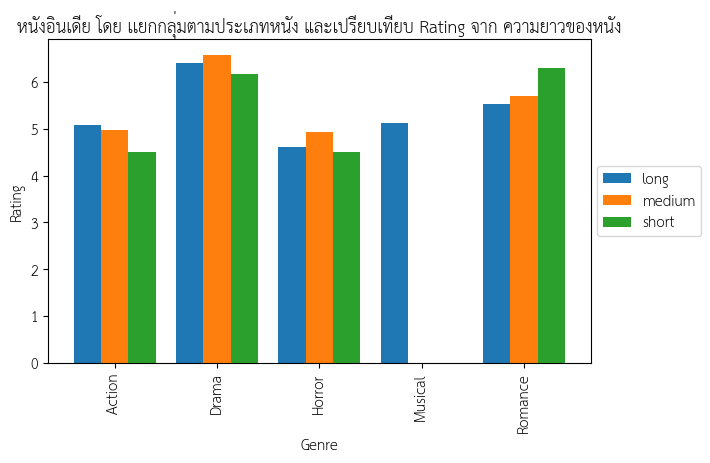

In [87]:
# Create the grouped bar chart
ax =india_bar_data.plot(kind='bar', figsize=(10, 6), width = 0.8)
# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('หนังอินเดีย โดย เเยกกลุ่มตามประเภทหนัง และเปรียบเทียบ Rating จาก ความยาวของหนัง')

# Move the legend outside the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust plot size
plt.gcf().set_size_inches(plt.gcf().get_size_inches() * 0.7)

# Show the plot
plt.show()

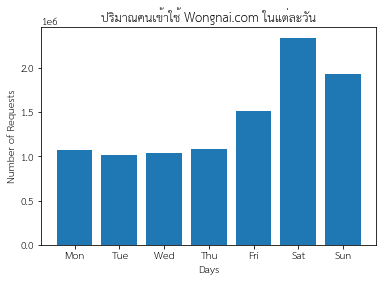

In [ ]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                         ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')
plt.title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน');

Text(0, 0.5, 'Number of Requests')

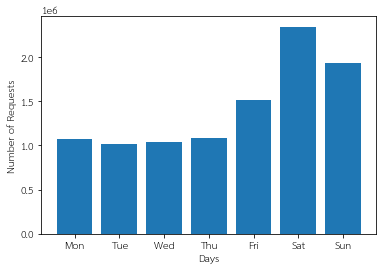

In [ ]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                         ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')

## Grouped bar chart

https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

แสดงปริมาณคนเข้าเว๊ปในแต่ละวัน โดยเปรียบเทียบช่วงเวลา 11:00-12:00 กับ 23:00-24:00

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0)
& (data['search_timestamp'].dt.time < time(hour=12))
& (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]  # monday 11:00-12:00

73249

In [ ]:
b4lunch = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
                         ]

In [ ]:
b4lunch

[73249, 73083, 75429, 78024, 99007, 174165, 165440]

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]

31874

In [ ]:
b4midnight = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
                         ]
b4midnight

[31874, 32258, 31153, 35944, 53174, 58306, 35801]

In [ ]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [ ]:
import numpy as np

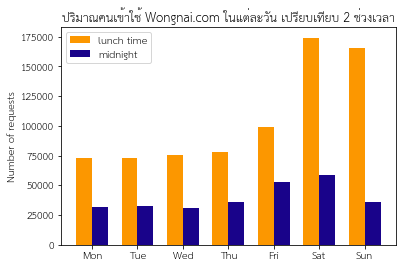

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, b4lunch, width, label='lunch time',color = '#fc9700')
rects2 = ax.bar(x + width/2, b4midnight, width, label='midnight',color = '#19038a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

## Stacked bar chart

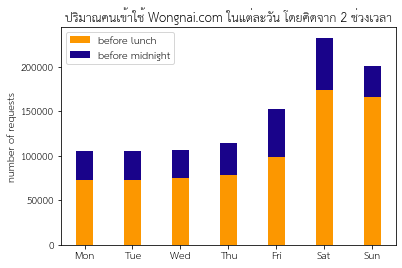

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

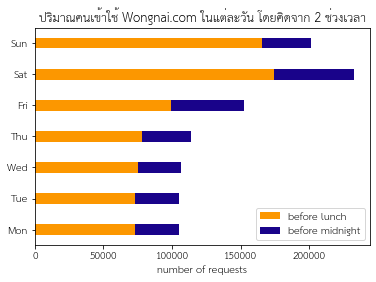

In [ ]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.barh(labels, b4midnight, width, left=b4lunch, label='before midnight',color = '#19038a')

ax.set_xlabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

## [เช็คชื่อ] โดยให้วาด Bar chart ที่เปรียบเทียบปริมาณคนใช้งาน Wongnai.com สองช่วงเวลา โดยให้กราฟแสดงสัดส่วนของปริมาณคนใช้งานในแต่ละวันด้วย

## Histogram

## กราฟแสดงความถี่ของข้อมูล

ตัวอย่างข้อมูลที่ random มาจาก normal distribution ที่มี mean = 100  และ stdev = 15

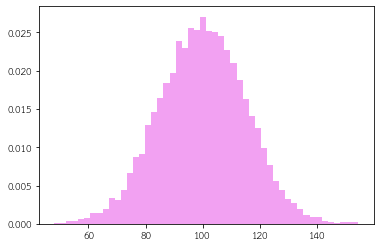

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(2021)

mu, sigma = 100, 15
X = mu + sigma * np.random.randn(10000)

plt.hist(X, 50, density = True, facecolor = 'violet', alpha = 0.75);

ตัวอย่างข้อมูล wongnai.com

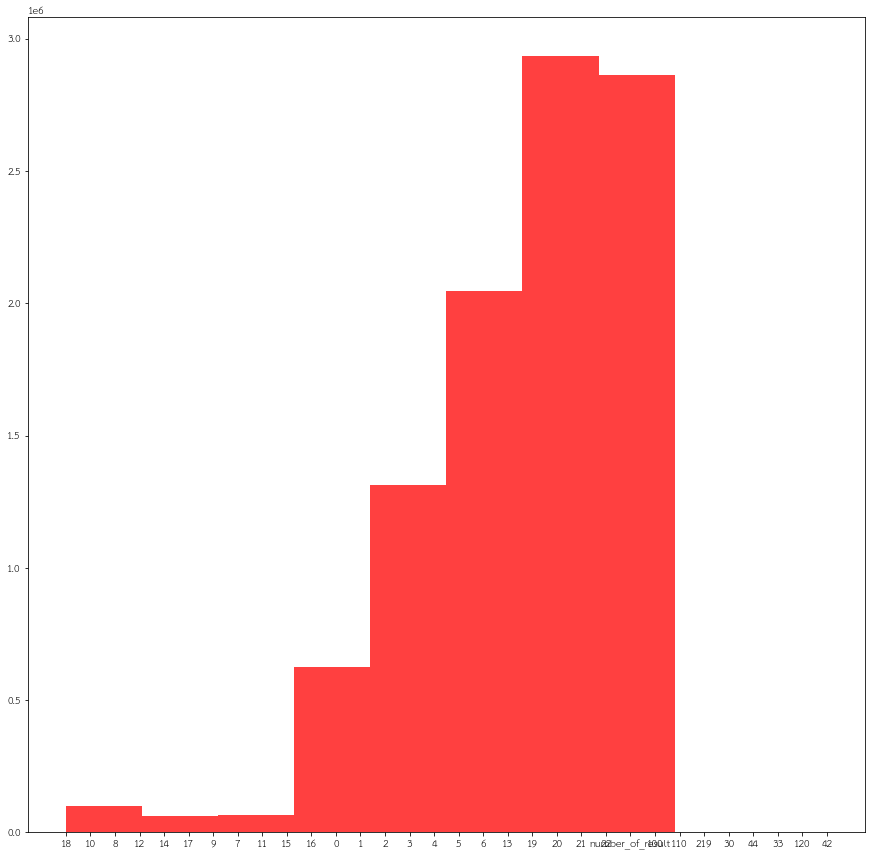

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[15,15]
output = plt.hist(list(data['number_of_result']),10,facecolor = 'red' ,alpha = 0.75)

แก้ไข แกน x ที่เรียงข้อมูลผิด

In [ ]:
data.dtypes

Unnamed: 0                   int64
search_id                   object
search_timestamp    datetime64[ns]
user_agent                  object
q                           object
user_id                    float64
session_id                  object
number_of_result            object
lat                         object
long                        object
dtype: object

เรียกดู data type ของ ตัวแปร

In [ ]:
type(data['number_of_result'][0])

int

ตรวจสอบ data type ของตัวแปร

In [ ]:
type(data['number_of_result'][0]) == int

True

ตรวจสอบดูทุกๆค่าใน column 'number_of_result'

In [ ]:
# for x in data['number_of_result']:
#     if type(x) != int:
#         print(f'{x} -> {type(x)}')


In [ ]:
new_type = data['number_of_result'].astype('int32')

ValueError: ignored

ลบ record ที่มีค่า ใน column 'number_of_result' เป็น number of result

In [ ]:
data[data['number_of_result']=='number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
1000016,1000032,search_id,NaT,user_agent,original_q,228667.0,session_id,number_of_result,lat,long


In [ ]:
data = data.drop(1000016)

In [ ]:
data[data['number_of_result']=='number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long


In [ ]:
new_type = data['number_of_result'].astype('int32')

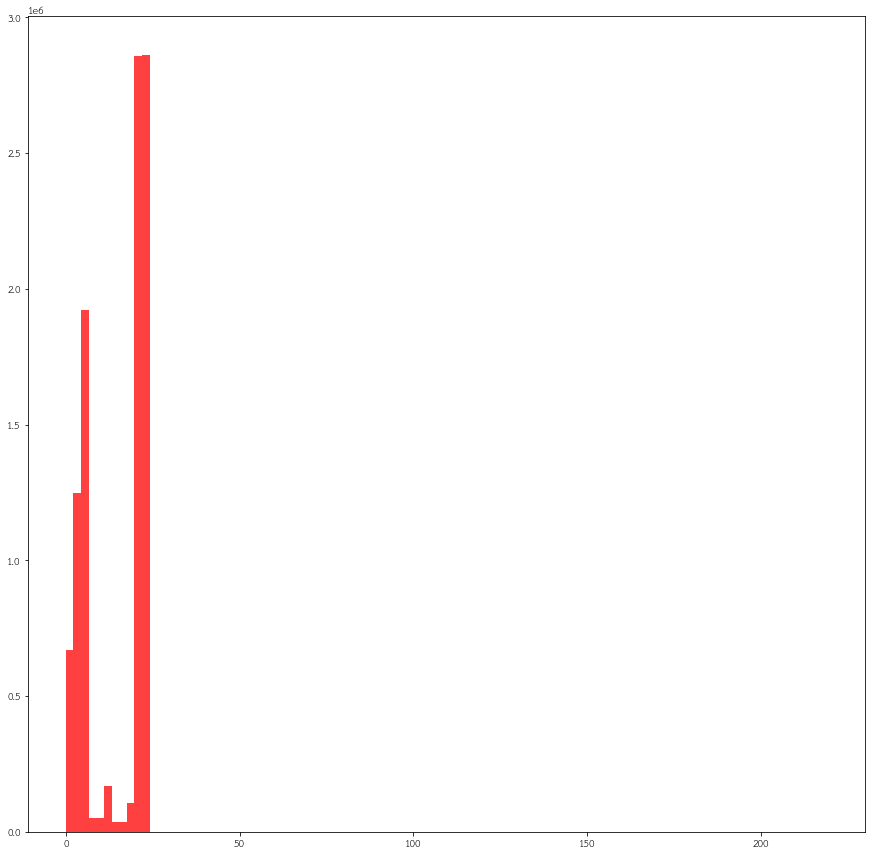

In [ ]:
output = plt.hist(new_type,100,facecolor = 'red' ,alpha = 0.75)

ลบ outlier

In [ ]:
new_type_nooutlier = new_type[new_type < 25]

In [ ]:
new_type.shape[0] - new_type_nooutlier.shape[0]

14

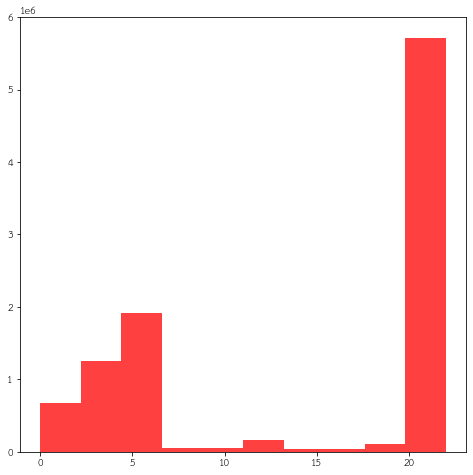

In [ ]:
matplotlib.rcParams['figure.figsize']=[8,8]
output = plt.hist(new_type_nooutlier,10,facecolor = 'red' ,alpha = 0.75)

Quiz 7 เปรียบเทียบความถี่ของแท่งที่มีค่ามากที่สุด กับ แท่งอื่นๆรวมกัน

In [ ]:
output

(array([ 670293., 1247269., 1921441.,   51703.,   50609.,  167502.,
          36883.,   35914.,  105490., 5717238.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

In [ ]:
output[0]

array([ 670293., 1247269., 1921441.,   51703.,   50609.,  167502.,
         36883.,   35914.,  105490., 5717238.])

In [ ]:
output[0][-1]

5717238.0

In [ ]:
sum(output[0][:-1])

4287104.0

## Tree map

In [ ]:
!pip install squarify

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import squarify

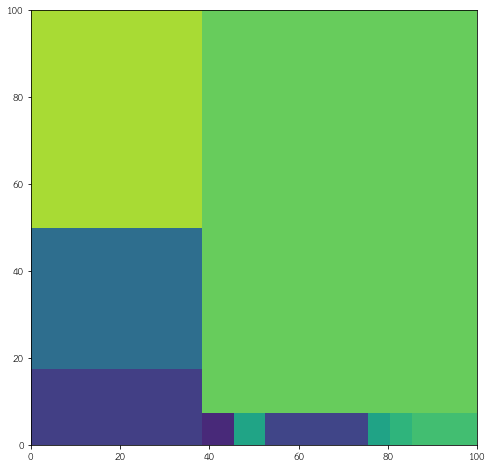

In [ ]:
squarify.plot(output[0])

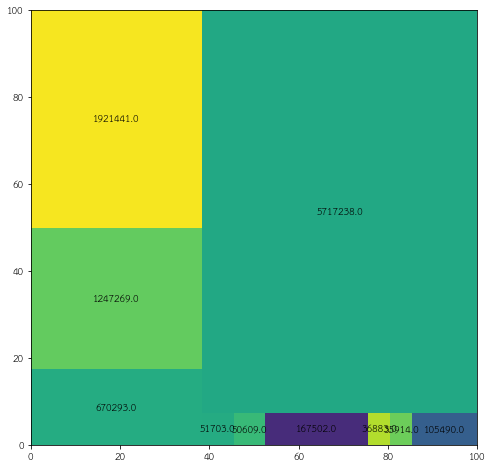

In [ ]:
squarify.plot(output[0],value=output[0])

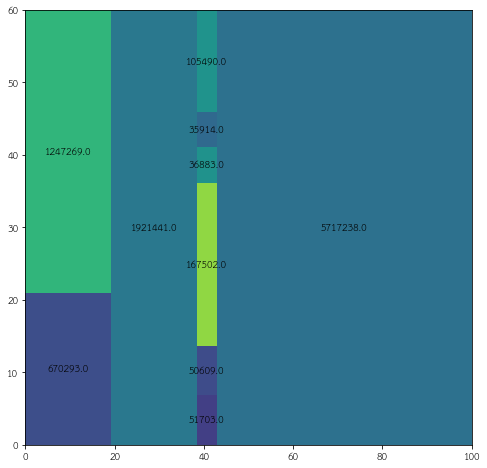

In [ ]:
squarify.plot(output[0],value=output[0],norm_y=60)

## Radar Chart

In [ ]:
import numpy as np
import pandas as pd  #import pandas มาเพราะข้อมูลจะเกี่ยวกับตาราง
import matplotlib.pyplot as plt
from math import pi #import math มาเนื่องจากเกี่ยวกับวงกลมนำมาใช้เพื่อดึงค่าพาย

In [ ]:
data = {'client_id' : ['c1' , 'c2' , 'c3' , 'c4'],
         'cheese' : [2,5,4,3],
         'beer' : [2,1,3,5],
         'chicken' : [5,3,3,4],
        'bread' : [4,3,2,1],
       'coffee' : [2,3,5,3]}
df = pd.DataFrame.from_dict(data)
df

,client_id,cheese,beer,chicken,bread,coffee
0,c1,2,2,5,4,2
1,c2,5,1,3,3,3
2,c3,4,3,3,2,5
3,c4,3,5,4,1,3


In [ ]:
categories = list(df.columns[1:])
categories

['cheese', 'beer', 'chicken', 'bread', 'coffee']

In [ ]:
values = df.mean().values.flatten().tolist()
values += values[:1] # repeat the first value to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

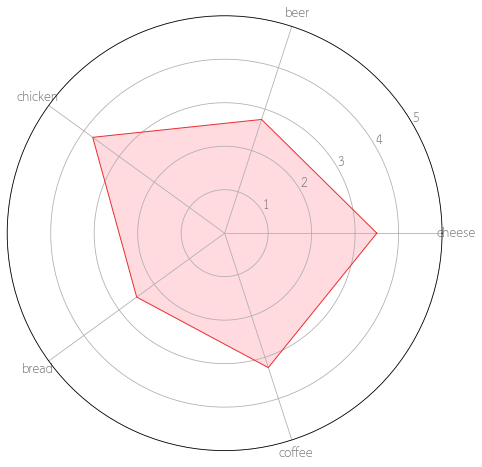

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

ax.plot(angles, values, linewidth=1, linestyle='solid' , color = '#ea3033') #เส้นกราฟ
ax.fill(angles, values, 'lightpink', alpha=0.5) #พื้นที่

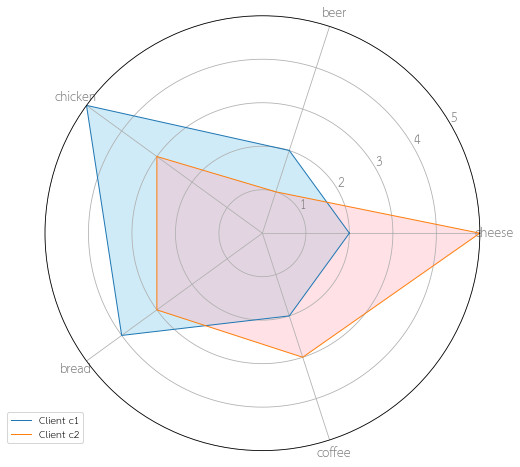

In [ ]:
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

# part 1
val_c1 = df.loc[0].drop('client_id').values.flatten().tolist()
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1,
        linestyle='solid', label='Client c1')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)

# part 2
val_c2=df.loc[1].drop('client_id').values.flatten().tolist()
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1,
        linestyle='solid', label='Client c2')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))